In [21]:
import pandas as pd
import seaborn as sns

## Metadata

In [2]:
dfm = pd.read_csv('../data/item_metadata.csv',dtype="str", sep=",", encoding="utf-8")
dfm_stack = dfm.set_index('item_id', drop=False, append=True).properties.str.split('|', expand=True).stack()
dfm.head()

,item_id,properties
0,5101,Satellite TV|Golf Course|Airport Shuttle|Cosme...
1,5416,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
2,5834,Satellite TV|Cosmetic Mirror|Safe (Hotel)|Tele...
3,5910,Satellite TV|Sailing|Cosmetic Mirror|Telephone...
4,6066,Satellite TV|Sailing|Diving|Cosmetic Mirror|Sa...


In [3]:
dfm_stack.head()

   item_id   
0  5101     0       Satellite TV
            1        Golf Course
            2    Airport Shuttle
            3    Cosmetic Mirror
            4       Safe (Hotel)
dtype: object

In [4]:
dfm_sparse = pd.get_dummies(dfm_stack, prefix=None, prefix_sep=None).groupby(level=1, sort=False).agg(max)
dfm_sparse.head()

,1 Star,2 Star,3 Star,4 Star,5 Star,Accessible Hotel,Accessible Parking,Adults Only,Air Conditioning,Airport Hotel,...,Terrace (Hotel),Theme Hotel,Towels,Very Good Rating,Volleyball,Washing Machine,Water Slide,Wheelchair Accessible,WiFi (Public Areas),WiFi (Rooms)
item_id,,,,,,,,,,,,,,,,,,,,,
5101,0,0,0,1,0,1,1,0,1,0,...,1,0,0,0,0,0,0,0,1,1
5416,0,0,0,1,0,0,0,0,0,0,...,1,0,0,1,0,0,0,1,1,1
5834,0,0,1,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,1
5910,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
6066,0,0,0,1,0,1,1,0,0,0,...,1,0,1,0,1,0,0,1,1,1


In [5]:
for s in dfm_sparse.columns:
    print(s)

1 Star
2 Star
3 Star
4 Star
5 Star
Accessible Hotel
Accessible Parking
Adults Only
Air Conditioning
Airport Hotel
Airport Shuttle
All Inclusive (Upon Inquiry)
Balcony
Bathtub
Beach
Beach Bar
Beauty Salon
Bed & Breakfast
Bike Rental
Boat Rental
Body Treatments
Boutique Hotel
Bowling
Bungalows
Business Centre
Business Hotel
Cable TV
Camping Site
Car Park
Casa Rural (ES)
Casino (Hotel)
Central Heating
Childcare
Club Hotel
Computer with Internet
Concierge
Conference Rooms
Convenience Store
Convention Hotel
Cosmetic Mirror
Cot
Country Hotel
Deck Chairs
Design Hotel
Desk
Direct beach access
Diving
Doctor On-Site
Eco-Friendly hotel
Electric Kettle
Excellent Rating
Express Check-In / Check-Out
Family Friendly
Fan
Farmstay
Fitness
Flatscreen TV
Free WiFi (Combined)
Free WiFi (Public Areas)
Free WiFi (Rooms)
Fridge
From 2 Stars
From 3 Stars
From 4 Stars
Gay-friendly
Golf Course
Good Rating
Guest House
Gym
Hairdresser
Hairdryer
Halal Food
Hammam
Health Retreat
Hiking Trail
Honeymoon
Horse Riding


## Sessions

In [6]:
df_train = pd.read_csv('../data/train.csv', sep=",", encoding="utf-8")

In [15]:
df_train['user_session'] = df_train['user_id'] + df_train['session_id']

In [16]:
print('Number of entries: ', len(df_train))
print('Number of different users: ', len(df_train.user_id.unique()))
print('Number of different sessions: ', len(df_train.user_session.unique()))


Number of entries:  15932992
Number of different users:  730803
Number of different sessions:  910683


,session_id
count,730803.000000
mean,1.246140
std,0.750184
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,201.000000


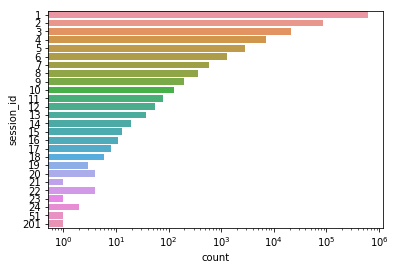

In [25]:
df_number_sessions_per_user = df_train[['user_id', 'session_id']].drop_duplicates().pivot_table(index=['user_id'], aggfunc='count')
g = sns.countplot(y='session_id', data=df_number_sessions_per_user)
g.set_xscale('log')
df_number_sessions_per_user.describe()

,session_id
count,730803.000000
mean,1.246140
std,0.750184
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,201.000000
